Imports

In [1]:
# import necessary modules related to dataframes, arrays, plots and scikit-learn metrics and model selection methods
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
 

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
# import the necessary util functions
from plotter import corr_heatmap, roc_curve_plot
from data_preprocess import nan_handler, scaler_imputer
from augmentation_datasplit import augmentation, datasplit
from ml_algo import fit_predict
from metrics import acc_calc

Reading the training and test datasets

In [4]:
X_train = pd.read_csv('data/X_train.csv')
X_train.drop(["Id"], axis=1, inplace=True)
y_train = pd.read_csv('data/y_train.csv')
y_train.drop(["Id"], axis=1, inplace=True)

X_test = pd.read_csv('data/X_test.csv')
X_test.drop(["Id"], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

In [5]:
# Visualizing the training dataset
X_train

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,21470,0.0,2.130706e+09,168.0,0.0,0.0,0.0,0.0,0.0,11968.0,...,187028.0,109090.0,228040.0,89664.0,296964.0,78936.0,58.0,0.0,0.0,0.0
1,40856,NaN,5.540000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,526386.0,277000.0,612436.0,441664.0,84968.0,2204.0,78.0,0.0,0.0,0.0
2,28,NaN,2.130706e+09,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,406.0,80.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38682,NaN,3.440000e+02,326.0,0.0,0.0,0.0,0.0,0.0,0.0,...,244622.0,116794.0,267896.0,307242.0,248998.0,164098.0,300820.0,11238.0,0.0,0.0
4,62218,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,499450.0,242448.0,458620.0,422742.0,390678.0,287052.0,427584.0,10146.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39895,27012,NaN,6.840000e+02,524.0,0.0,0.0,0.0,0.0,0.0,2864.0,...,164630.0,71862.0,97742.0,77936.0,136596.0,598610.0,12034.0,180.0,0.0,0.0
39896,1926,NaN,2.130706e+09,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8194.0,4228.0,21584.0,54614.0,528.0,50.0,18.0,0.0,0.0,0.0
39897,712,0.0,9.800000e+01,62.0,0.0,0.0,0.0,0.0,0.0,802.0,...,3400.0,964.0,2192.0,5428.0,6110.0,11382.0,0.0,0.0,0.0,0.0
39898,61980,NaN,3.060000e+02,226.0,0.0,0.0,0.0,0.0,0.0,0.0,...,388914.0,192924.0,302652.0,278680.0,218578.0,224358.0,881382.0,90840.0,0.0,0.0


In [6]:
# Visualizing the first 5 observations of the training dataset
X_train.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,21470,0.0,2.130706e+09,168.0,0.0,0.0,0.0,0.0,0.0,11968.0,...,187028.0,109090.0,228040.0,89664.0,296964.0,78936.0,58.0,0.0,0.0,0.0
1,40856,NaN,5.540000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,526386.0,277000.0,612436.0,441664.0,84968.0,2204.0,78.0,0.0,0.0,0.0
2,28,NaN,2.130706e+09,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,406.0,80.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38682,NaN,3.440000e+02,326.0,0.0,0.0,0.0,0.0,0.0,0.0,...,244622.0,116794.0,267896.0,307242.0,248998.0,164098.0,300820.0,11238.0,0.0,0.0
4,62218,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,499450.0,242448.0,458620.0,422742.0,390678.0,287052.0,427584.0,10146.0,0.0,0.0


In [7]:
# Basic Information about the dataset
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39900 entries, 0 to 39899
Columns: 170 entries, aa_000 to eg_000
dtypes: float64(169), int64(1)
memory usage: 51.8 MB


In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17100 entries, 0 to 17099
Columns: 170 entries, aa_000 to eg_000
dtypes: float64(169), int64(1)
memory usage: 22.2 MB


In [9]:
# Visualizing the types of data variables
X_train.dtypes

aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 170, dtype: object

In [10]:
# Describing the data
X_train.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,3.990000e+04,9121.000000,3.765900e+04,2.993400e+04,38240.000000,38240.000000,3.943400e+04,3.943400e+04,3.943400e+04,3.943400e+04,...,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,38087.000000,38088.000000
mean,6.094339e+04,0.728210,3.536753e+08,2.872309e+05,6.427877,10.552354,2.017626e+02,1.096192e+03,9.547083e+03,9.478814e+04,...,4.486738e+05,2.129917e+05,4.489956e+05,4.013561e+05,3.390282e+05,3.439853e+05,1.375559e+05,8.265914e+03,0.074514,0.236137
std,2.598214e+05,3.107561,7.927850e+08,4.961607e+07,112.420166,177.143548,1.823295e+04,3.272456e+04,1.563888e+05,7.711758e+05,...,1.121988e+06,5.316487e+05,1.129791e+06,1.130969e+06,1.102586e+06,1.626701e+06,4.350107e+05,4.968480e+04,3.610742,12.155503
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.680000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.976000e+03,1.186000e+03,2.740000e+03,3.660000e+03,5.240000e+02,1.160000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.082300e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.351960e+05,1.121640e+05,2.236870e+05,1.907450e+05,9.458700e+04,4.204100e+04,3.992000e+03,0.000000e+00,0.000000,0.000000
75%,4.889650e+04,0.000000,9.700000e+02,4.340000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.394680e+05,2.175255e+05,4.667520e+05,4.037860e+05,2.769340e+05,1.682435e+05,1.397730e+05,1.998500e+03,0.000000,0.000000
max,4.294967e+07,134.000000,2.130707e+09,8.584298e+09,11044.000000,14186.000000,3.376892e+06,3.708310e+06,1.004568e+07,2.904730e+07,...,3.123272e+07,1.454922e+07,2.454544e+07,5.743524e+07,3.160781e+07,3.755240e+07,1.718575e+07,4.570398e+06,350.000000,1720.000000


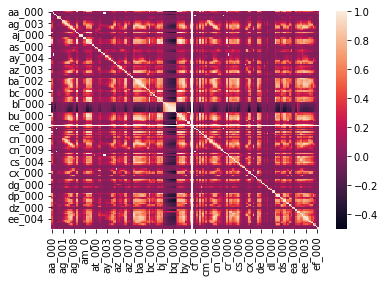

In [11]:
corr_heatmap(X_train)

In [12]:
# Data preprocessing
nan_handler(X_train, y_train)
X_train_preprocess, X_test_preprocess = scaler_imputer(X_train, X_test)
print(X_train_preprocess.shape)
print(X_test_preprocess.shape)

(39900, 170)
(17100, 170)


In [13]:
# Data augmentation
X, y, X_test_pca = augmentation(X_train_preprocess, X_test_preprocess, y_train)

# Data Split for Validation
X_train1, X_validate, y_train1, y_validate, y_train1_ravel, y_validate_ravel, X_test_pca = datasplit(X, y, X_test_pca)

In [16]:
# Defining the classifiers
classifiers = [KNeighborsClassifier(),
               RandomForestClassifier(n_estimators=150, criterion='entropy', max_depth=42, max_features='sqrt', random_state=40),
               XGBClassifier(eval_metric='logloss'),
               KMeans(n_clusters=2, init='random', n_init=25, max_iter=5000, tol=1e-4, random_state=50),
               DecisionTreeClassifier(),
               LogisticRegression(),
               LinearSVC(),
               GaussianNB(),
               GradientBoostingClassifier(),
               AdaBoostClassifier()]

F1:  0.9855539336588314
Precision:  0.9720015885623511
Recall:  0.9994895354772844
Validation F3 Score: 0.9966709764117809

Confusion Matrix
[[9512  282]
 [   5 9790]]


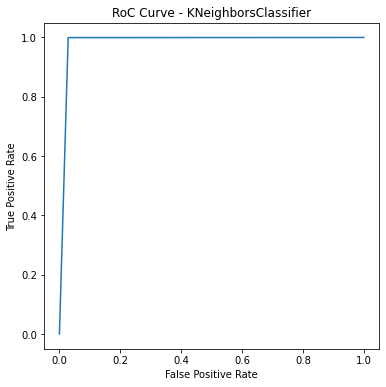

F1:  0.9916392196605016
Precision:  0.9844064386317908
Recall:  0.9989790709545686
Validation F3 Score: 0.9975024211223813

Confusion Matrix
[[9639  155]
 [  10 9785]]


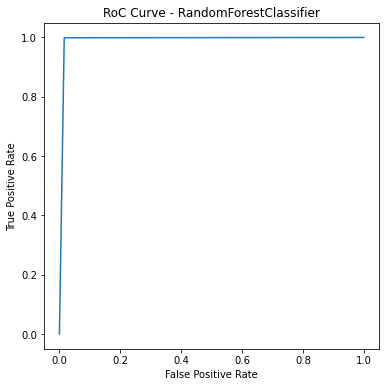

F1:  0.9916894699503395
Precision:  0.9845054834490391
Recall:  0.9989790709545686
Validation F3 Score: 0.9975125899647277

Confusion Matrix
[[9640  154]
 [  10 9785]]


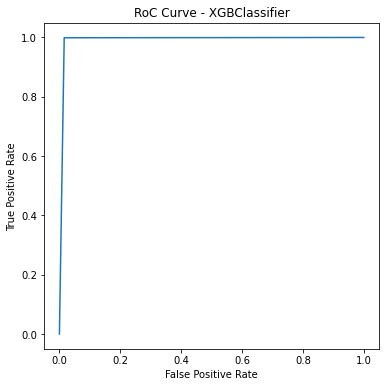

F1:  0.6982209676360532
Precision:  0.9779330636263333
Recall:  0.542930066360388
Validation F3 Score: 0.5682048871176264

Confusion Matrix
[[9674  120]
 [4477 5318]]


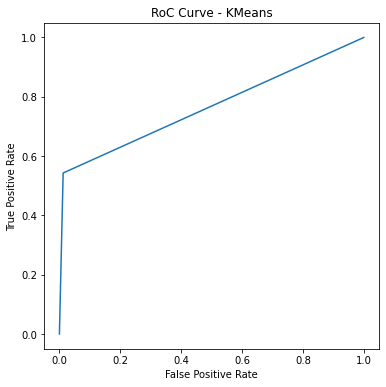

F1:  0.9862971985383677
Precision:  0.9806236754465637
Recall:  0.9920367534456356
Validation F3 Score: 0.9908835046500245

Confusion Matrix
[[9602  192]
 [  78 9717]]


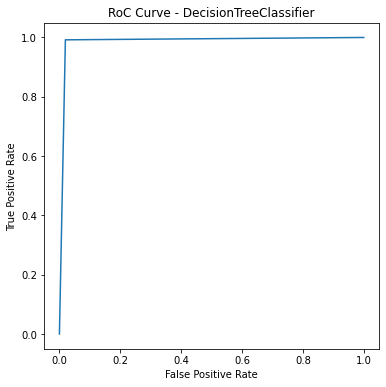

F1:  0.9517714999219604
Precision:  0.9704010184595799
Recall:  0.933843797856049
Validation F3 Score: 0.9373751037599531

Confusion Matrix
[[9515  279]
 [ 648 9147]]


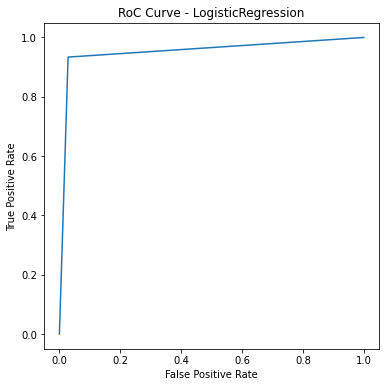

F1:  0.9525191789342732
Precision:  0.9674634094977361
Recall:  0.9380296069423175
Validation F3 Score: 0.9408921476262646

Confusion Matrix
[[9485  309]
 [ 607 9188]]


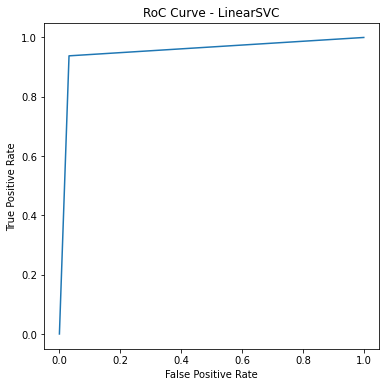

F1:  0.8757639737748638
Precision:  0.9607460685115202
Recall:  0.804594180704441
Validation F3 Score: 0.8178874613420785

Confusion Matrix
[[9472  322]
 [1914 7881]]


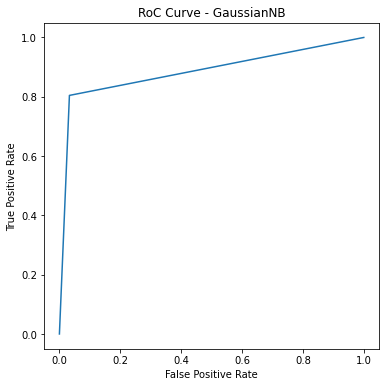

F1:  0.9689189872138273
Precision:  0.9593674939951962
Recall:  0.9786625829504849
Validation F3 Score: 0.9766982179791538

Confusion Matrix
[[9388  406]
 [ 209 9586]]


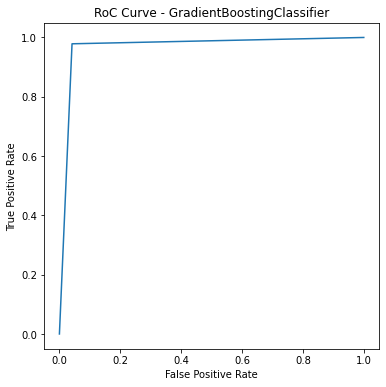

F1:  0.9524731292343742
Precision:  0.950488003253355
Recall:  0.9544665645737621
Validation F3 Score: 0.954067210254003

Confusion Matrix
[[9307  487]
 [ 446 9349]]


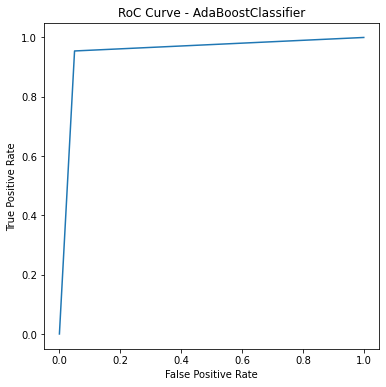

In [17]:
# Training and Prediction
for cf in classifiers:
    y_pred_valid, y_pred_test = fit_predict(cf, X_train1, X_validate, y_train1, X_test_pca)
    acc_calc(y_validate_ravel, y_pred_valid)
    roc_curve_plot(y_validate_ravel, y_pred_valid, cf.__class__.__name__)